In [1]:
!pip install split-folders


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 256
CHANNELS=3
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode='sparse'
#     save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [3]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [4]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)
test_generator = validation_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [6]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [9]:
1506/32

47.0625

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = 47,
    batch_size =32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=19,
)

Epoch 1/19
47/47 [==============================] - 144s 3s/step - loss: 0.9302 - accuracy: 0.4688 - val_loss: 0.8898 - val_accuracy: 0.4740
Epoch 2/19
47/47 [==============================] - 119s 3s/step - loss: 0.7588 - accuracy: 0.6228 - val_loss: 0.5381 - val_accuracy: 0.7135
Epoch 3/19
47/47 [==============================] - 118s 3s/step - loss: 0.5187 - accuracy: 0.7714 - val_loss: 0.4926 - val_accuracy: 0.7760
Epoch 4/19
47/47 [==============================] - 121s 3s/step - loss: 0.3903 - accuracy: 0.8471 - val_loss: 0.3869 - val_accuracy: 0.8177
Epoch 5/19
47/47 [==============================] - 117s 2s/step - loss: 0.2917 - accuracy: 0.8976 - val_loss: 0.3366 - val_accuracy: 0.8385
Epoch 6/19
47/47 [==============================] - 118s 3s/step - loss: 0.3421 - accuracy: 0.8623 - val_loss: 0.3628 - val_accuracy: 0.8594
Epoch 7/19
47/47 [==============================] - 119s 3s/step - loss: 0.3202 - accuracy: 0.8704 - val_loss: 0.2843 - val_accuracy: 0.8854
Epoch 8/19
47

In [11]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 25s 2s/step - loss: 0.2122 - accuracy: 0.9327


### plotting he accuracy andloss curves

In [12]:
scores


[0.21220189332962036, 0.9327146410942078]

In [13]:
history 


In [14]:
history.params

{'verbose': 1, 'epochs': 19, 'steps': 47}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

19

In [19]:
history.history['loss'][:5] #show loss of first 5 epochs

[0.9301915764808655,
 0.7588347792625427,
 0.5187273025512695,
 0.39025914669036865,
 0.29169169068336487]

In [20]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss=history.history['val_loss']

In [21]:
val_acc

[0.4739583432674408,
 0.7135416865348816,
 0.7760416865348816,
 0.8177083134651184,
 0.8385416865348816,
 0.859375,
 0.8854166865348816,
 0.8541666865348816,
 0.859375,
 0.9114583134651184,
 0.9114583134651184,
 0.9270833134651184,
 0.8854166865348816,
 0.9114583134651184,
 0.9375,
 0.9322916865348816,
 0.9270833134651184,
 0.953125,
 0.9166666865348816]

In [22]:
acc

[0.4687924087047577,
 0.6227951049804688,
 0.7713704109191895,
 0.8470744490623474,
 0.8975576758384705,
 0.8622795343399048,
 0.8704206347465515,
 0.9009497761726379,
 0.9185888767242432,
 0.9287652373313904,
 0.9375848174095154,
 0.9443690776824951,
 0.9246947169303894,
 0.9151967167854309,
 0.9362279772758484,
 0.9518317580223083,
 0.9545454382896423,
 0.9531885981559753,
 0.9613296985626221]

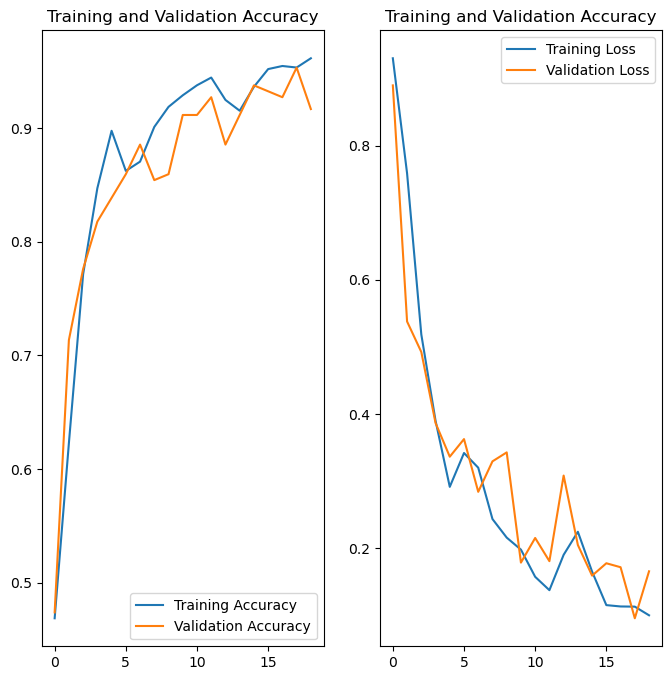

In [23]:
EPOCHS = 19

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS), val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [26]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 826ms/step
predicted label: Potato___Early_blight


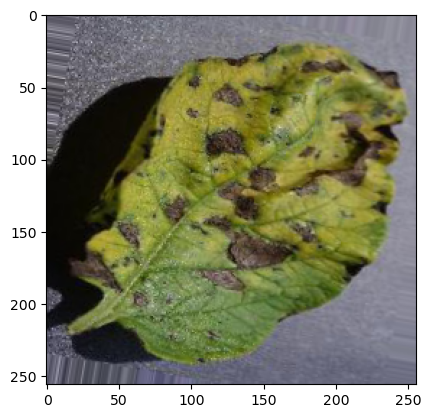

In [27]:
import numpy as np

for images_batch, labels_batch in test_generator:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Now run inference on few sample images

1/1 [==============================] - 0s 60ms/step


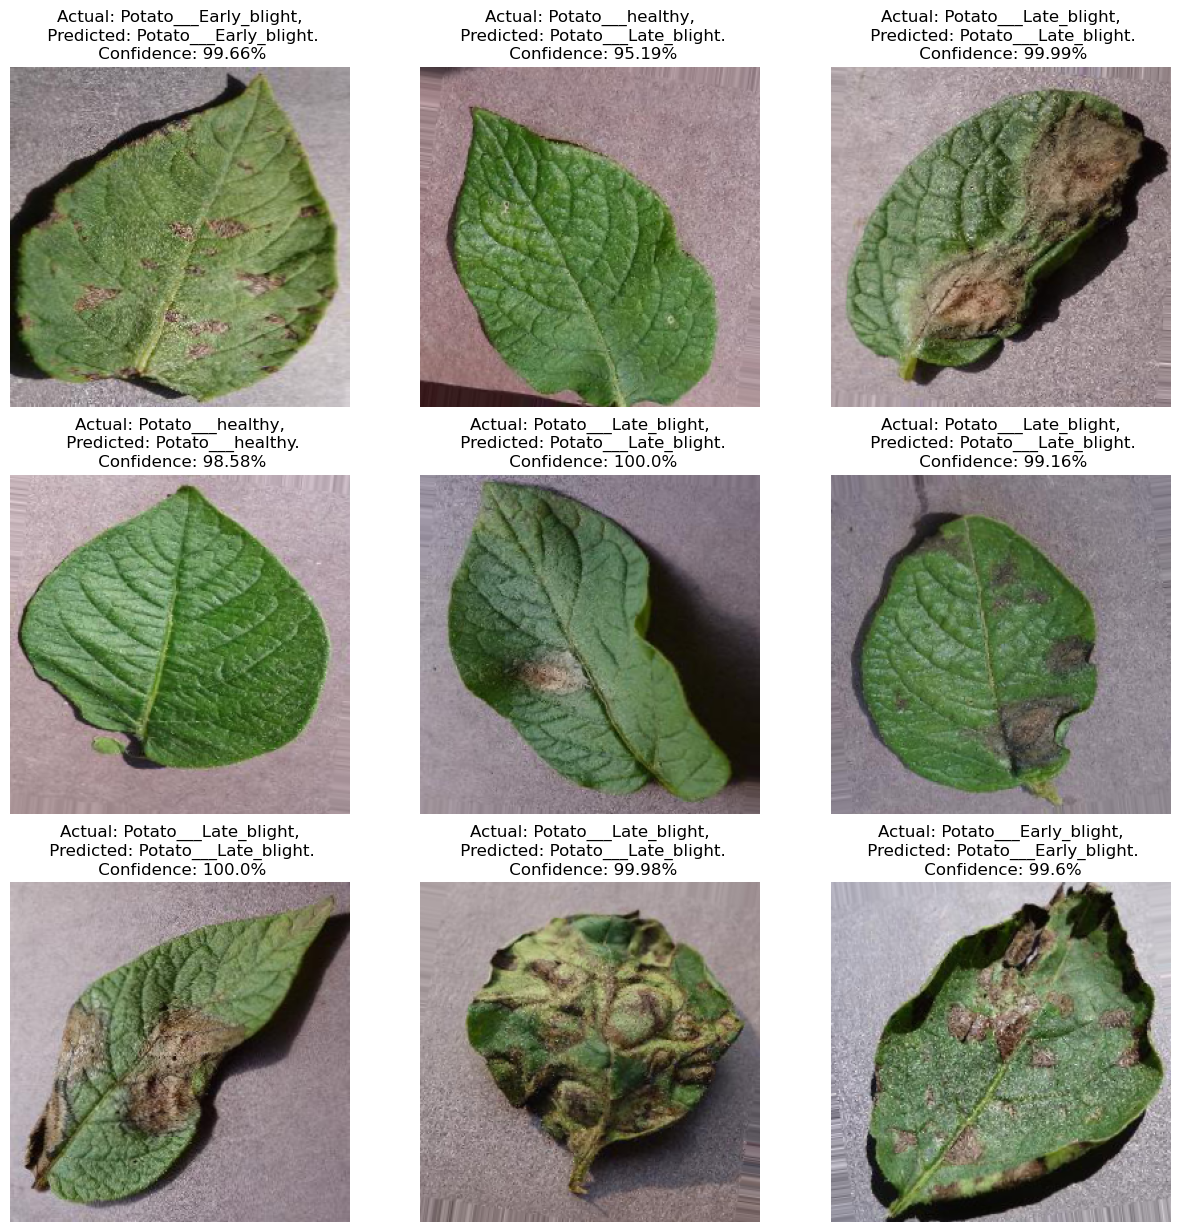

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

##### Saving the Model

###### Save model in h5 format so that there is just one file and we can upload that to GCP conveniently


In [30]:
model.save("../potatoes.h5")